In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Blog post solution #3
def neighbors(position):
    NEIGHBORS_MAP = {
    1: (6, 8),
    2: (7, 9),
    3: (4, 8),
    4: (3, 9, 0),
    5: tuple(),  # 5 has no neighbors
    6: (1, 7, 0),
    7: (2, 6),
    8: (1, 3),
    9: (2, 4),
    0: (4, 6),
}

    return NEIGHBORS_MAP[position]

def count_sequences(start_position, num_hops):
    cache = {}

    def helper(position, num_hops):
        if (position, num_hops) in cache:
            return cache[ (position, num_hops) ]

        if num_hops == 0:
            return 1

        else:
            num_sequences = 0
            for neighbor in neighbors(position):
                num_sequences += helper(neighbor, num_hops - 1)
            cache[ (position, num_hops) ] = num_sequences
            return num_sequences

    res = helper(start_position, num_hops)
    return res

def blog_solution(num_hops):
    res = []
    for i in range(0, 10):
        res.append(count_sequences(i, num_hops))
    
    return res

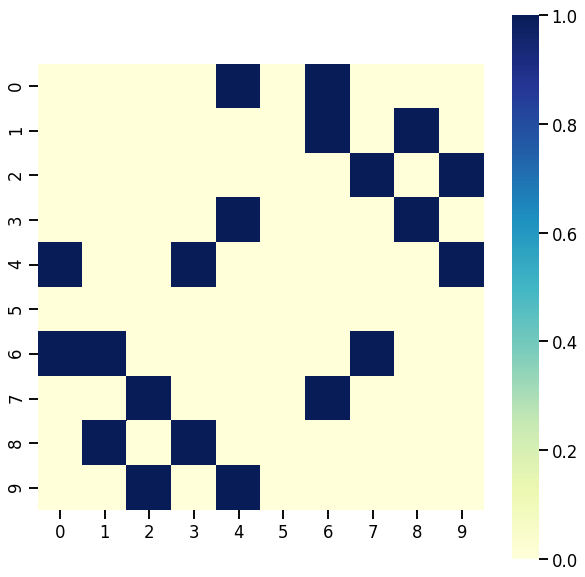

In [44]:
# Create adjacency
def get_adjacency():
    NEIGHBORS_MAP = {
    1: (6, 8),
    2: (7, 9),
    3: (4, 8),
    4: (3, 9, 0),
    5: tuple(),  # 5 has no neighbors
    6: (1, 7, 0),
    7: (2, 6),
    8: (1, 3),
    9: (2, 4),
    0: (4, 6),
    }
    
    A = np.zeros((10, 10), dtype=np.int)

    for key, val in NEIGHBORS_MAP.items():
        for j in val:
            A[key, j] = 1
            
    return A

A = get_adjacency()

with sns.plotting_context("talk", font_scale=1):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(A, square=True, cmap="YlGnBu")

In [21]:
def linear_algebra(num_hops):
    A = get_adjacency()
    
    W, V = np.linalg.eig(A)
    
    return (V @ np.diag(W ** num_hops) @ V.T).sum(axis=1)

def matrix_mul(num_hops):
    A = get_adjacency()
    
    return np.linalg.matrix_power(A, num_hops).sum(axis = 1)

### Try num_hops = 10

In [22]:
linear_algebra(10)

array([4608., 3728., 2848., 3728., 4608.,    0., 4608., 3728., 2848.,
       3728.])

In [24]:
matrix_mul(10)

array([4608, 3728, 2848, 3728, 4608,    0, 4608, 3728, 2848, 3728])

In [41]:
blog_solution(10)

[4608, 3728, 2848, 3728, 4608, 0, 4608, 3728, 2848, 3728]

### Try num_hops = 50

In [33]:
linear_algebra(50)

array([1.10566149e+18, 8.94498933e+17, 6.83336379e+17, 8.94498933e+17,
       1.10566149e+18, 0.00000000e+00, 1.10566149e+18, 8.94498933e+17,
       6.83336379e+17, 8.94498933e+17])

In [34]:
matrix_mul(50)

array([1105661487394848768,  894498933328314368,  683336379261779968,
        894498933328314368, 1105661487394848768,                   0,
       1105661487394848768,  894498933328314368,  683336379261779968,
        894498933328314368])

In [42]:
blog_solution(50)

[1105661487394848768,
 894498933328314368,
 683336379261779968,
 894498933328314368,
 1105661487394848768,
 0,
 1105661487394848768,
 894498933328314368,
 683336379261779968,
 894498933328314368]

### Compare results for accuracy

Floating point arithematic strikes again!

In [38]:
(linear_algebra(50) - matrix_mul(50)) 

array([5248., 4352., 4736., 5120., 6272.,    0., 6272., 5120., 4352.,
       4480.])

In [43]:
blog_solution(50) - matrix_mul(50)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
%prun -r blog_solution(5)